In [31]:
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras import datasets
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization

In [3]:
fashion_mnist = datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
type(train_images)

numpy.ndarray

In [5]:
type(train_labels)

numpy.ndarray

In [6]:
print(len(train_images))

60000


In [7]:
print(len(train_labels))

60000


In [8]:
print(len(train_images[0]))

28


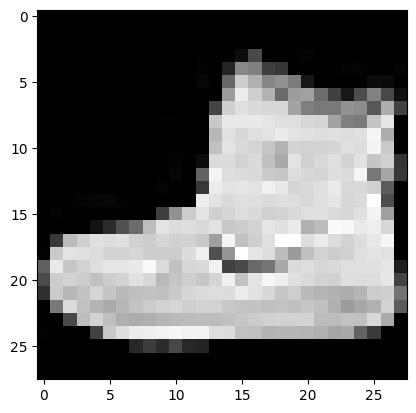

In [9]:
plt.imshow(train_images[0],cmap='gray')
plt.show()

In [10]:
# Normalizing
train_images,test_images = train_images/255.0,test_images/255.0

In [11]:
# reshape image into single channel
train_images = train_images.reshape((train_images.shape[0],28,28,1))
test_images = test_images.reshape((test_images.shape[0],28,28,1))

In [86]:
# CNN model building

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))

model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [87]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_35 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_39 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_36 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_40 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_12 (Flatten)        (None, 576)             

In [88]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,optimizer='adam',metrics=['accuracy'])

In [89]:
history = model.fit(train_images,train_labels,epochs=5,validation_data=(test_images,test_labels))

Epoch 1/5
1875/1875 [==============================] - 10s 4ms/step - loss: 0.4910 - accuracy: 0.8220 - val_loss: 0.3732 - val_accuracy: 0.8696
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3184 - accuracy: 0.8840 - val_loss: 0.3463 - val_accuracy: 0.8723
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2752 - accuracy: 0.8988 - val_loss: 0.2867 - val_accuracy: 0.8954
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2442 - accuracy: 0.9105 - val_loss: 0.2881 - val_accuracy: 0.9000
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2209 - accuracy: 0.9178 - val_loss: 0.2697 - val_accuracy: 0.9047


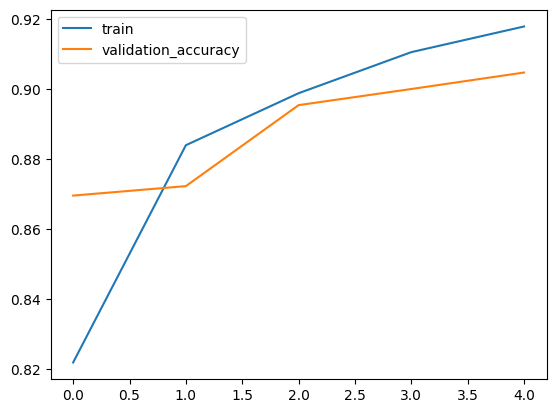

In [90]:
# ACCURACY
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='validation_accuracy')

plt.legend()
plt.show()

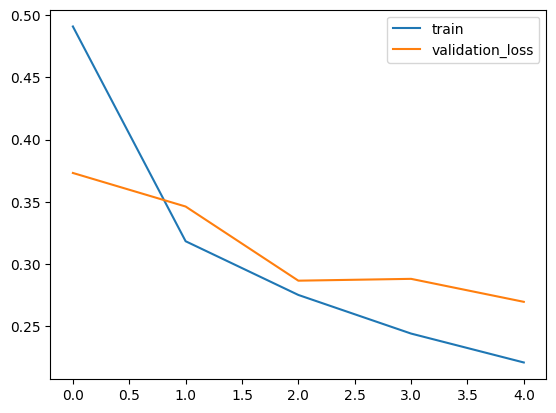

In [91]:
# LOSS
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation_loss')

plt.legend()
plt.show()

In [93]:
# Evaluate the model
acc = model.evaluate(test_images,test_labels,verbose=2)
print(f"Test accuracy is: {acc}")

313/313 - 1s - loss: 0.2697 - accuracy: 0.9047 - 613ms/epoch - 2ms/step
Test accuracy is: [0.26967698335647583, 0.904699981212616]


In [94]:
model.save("trained_fashion_mnist_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
